# Implicit Radiation Transport Tests
#### ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract), § 4)
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/28/2023          |
| Updated |  09/19/2023          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $L_0 / v_0$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Velocity $v_0 = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{p})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{p})$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} \equiv \mathcal{C} \equiv c/v_0$
  - $\mathbb{P} \equiv \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$


## 4.1. Thermal Equilibrium in a Uniform Medium

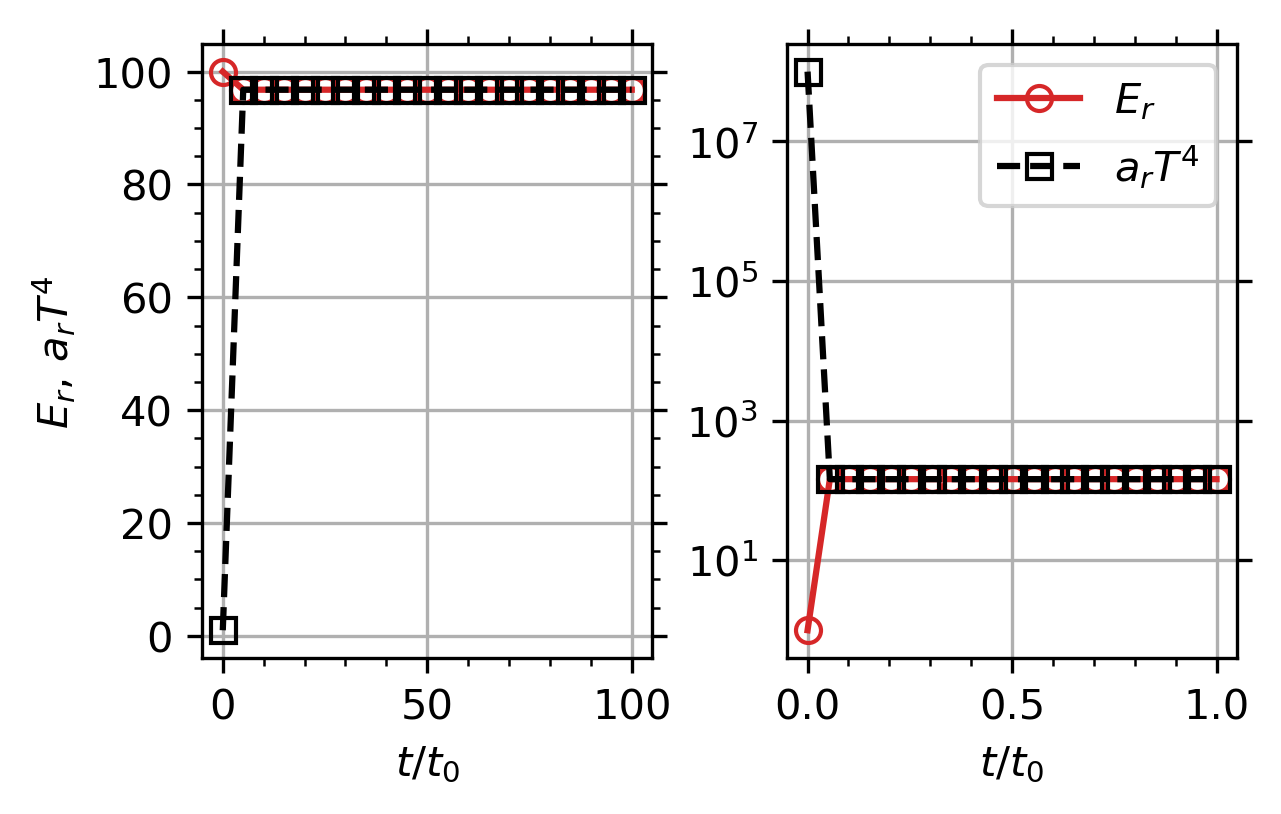

In [3]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(4.45, 2.66), dpi=300)
path = 'thermal_relaxation/'

# Test 1
athinput = athena_read.athinput(path + 'athinput.thermal_relaxation')
gamma = athinput['hydro']['gamma']   # C_p/C_v = 1 + 2/DoF
prat = athinput['radiation']['prat'] # dimensionless P = a_rT_0^4/P_0
hst = athena_read.hst(path + 'output/thermal.hst')
T = (hst['tot-E']*(gamma - 1))      # thermal_relaxation.cpp, line 63
axs[0].plot(hst['time'], hst['Er'], color='tab:red', marker='o',
            fillstyle='none')
axs[0].plot(hst['time'], T**4, color='k', marker='s', ls='--',
            fillstyle='none')
axs[0].set(ylabel='$E_r,\,a_rT^4$')

# Test 2
athinput = athena_read.athinput(path + 'athinput.thermal_relaxation2')
prat = athinput['radiation']['prat'] # dimensionless P = a_rT_0^4/P_0
hst = athena_read.hst(path + 'output/thermal2.hst')
T = (hst['tot-E']*(gamma - 1))
axs[1].semilogy(hst['time'], hst['Er'], color='tab:red', marker='o',
                fillstyle='none',              label='$E_r$')
axs[1].semilogy(hst['time'], T**4, color='k', marker='s', ls='--',
                fillstyle='none', label='$a_rT^4$')
axs[1].legend()

for ax in axs:
    ax.grid()
    ax.minorticks_on()
    ax.set(xlabel='$t/t_0$')
    ax.tick_params(which='both', top=True, right=True)

plt.subplots_adjust(hspace=0, wspace=0.3)
# plt.savefig('figs/NAME.pdf', bbox_inches='tight', pad_inches=0.01)

Cf. Figure 1 ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract))

**NOTE**: $T \propto P = \rho(\gamma - 1)u$, where $u$ is the specific internal energy of the gas [(Classical ideal gas law)](https://en.wikipedia.org/wiki/Equation_of_state#Classical_ideal_gas_law).

## 4.2. Crossing Beams in Vacuum

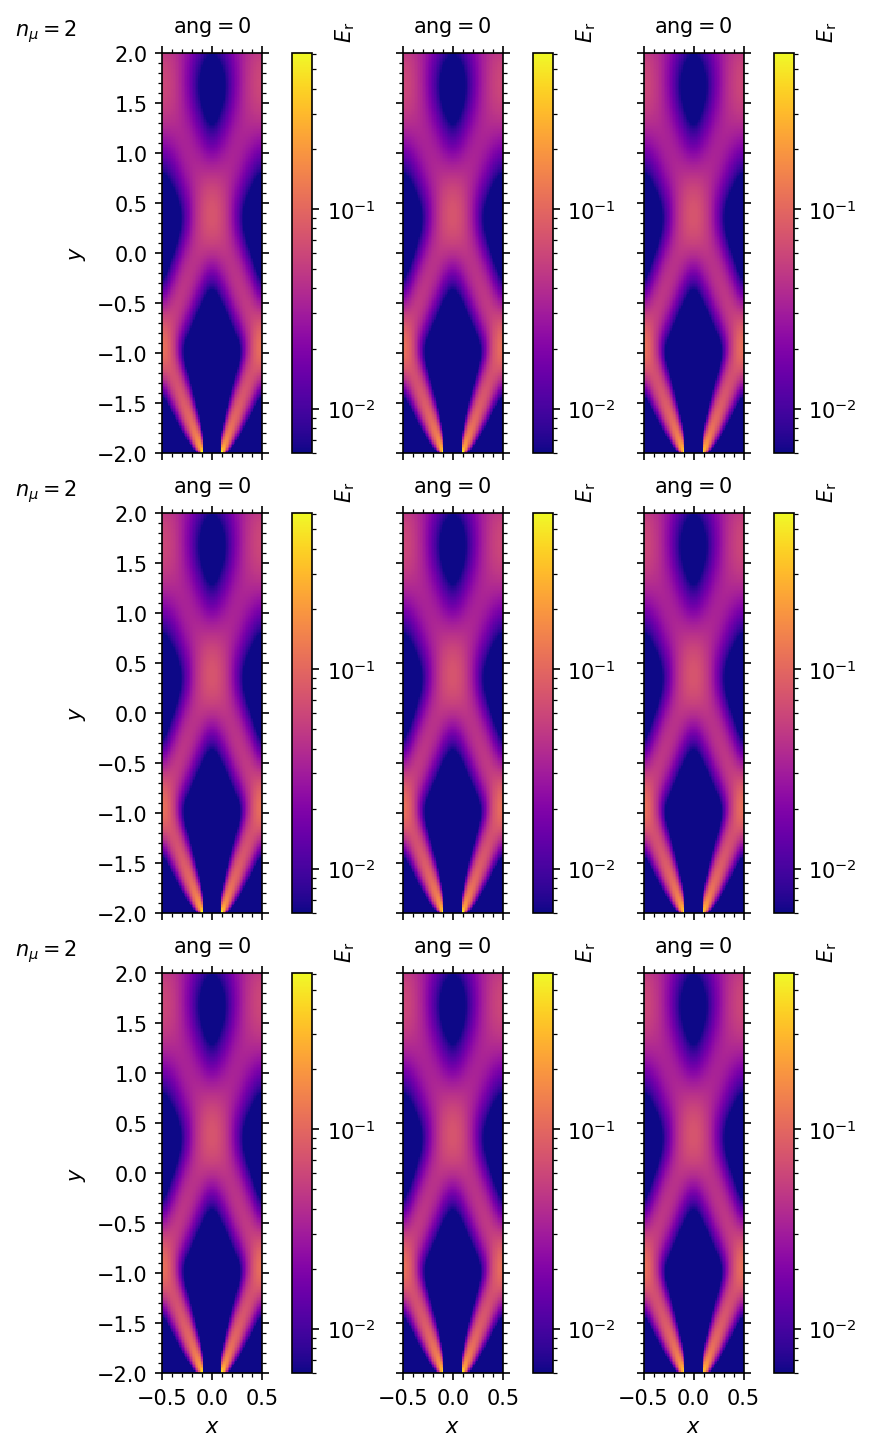

In [73]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam/nmu'
nmus = [2, 2, 2]
angs = [0, 0, 0]
vmin, vmax = 6e-3, 6
fig, axs = plt.subplots(len(nmus), len(angs), sharex=True, sharey=True,
                        figsize=(9.32, 11.43), dpi=150)

for i, nmu in enumerate(nmus):
    for j, ang in enumerate(angs):
        # Read and plot
        path = f'{wd}/{nmu}'
        athinput = athena_read.athinput(f'{path}/athinput.beam')
        athdf = athena_read.athdf(f'{path}/output/beam.out2.00010.athdf')
        clip = np.clip(athdf['Er'][0], vmin, vmax)
        Er = axs[i][j].pcolormesh(athdf['x1v'], athdf['x2v'], clip,
                                  norm=colors.LogNorm(), cmap='plasma')

        # Format (sub)plots
        cb_Er = fig.colorbar(Er, ax=axs[i][j])
        axs[i][j].label_outer()
        axs[i][j].minorticks_on()
        axs[i][j].set_title(f'ang$={ang}$', pad=10, fontsize='medium')
        axs[i][j].set(aspect='equal')
        axs[i][j].text(1.95, 1.08, '$E_\mathrm{r}$', ha='right', va='top',
                       rotation='vertical', transform=axs[i][j].transAxes)
        axs[i][j].tick_params(axis='both', which='both', top=True, right=True)

        if i == (len(nmus) - 1): axs[i][j].set(xlabel='$x$')

    axs[i][0].set(ylabel='$y$')
    axs[i][0].text(-1.47, 1.09, f'$n_\mu={nmu}$', ha='left', va='top',
                   transform=axs[i][0].transAxes)

plt.subplots_adjust(hspace=0.15, wspace=-0.6)
# plt.savefig('figs/NAME.pdf', bbox_inches='tight', pad_inches=0.01)

Cf. Figure 3 ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract))